In [1]:
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd

plt.style.use("ggplot")

# Get RESA2 discharge

Some chemistry sampling stations in RESA2 are linked to "discharge stations", making it possible to extract area-scaled discharge for the water sampling location.

This notebook illustrates how to extract discharge time series for the FELTFO stations.

In [2]:
# Connect to Nivabasen
eng = nivapy.da.connect()

Username:  ········
Password:  ········


Connection successful.


In [3]:
# User input
stn_codes = ["BIE01", "LAE01", "OVELV 19 23", "STE01", "DALELV", "KAE01"]
st_yr, end_yr = 2000, 2022

In [4]:
# Get project
proj_df = nivapy.da.select_resa_projects(eng)
proj_df = proj_df.query("project_name == 'FELTFO'")
proj_df

599 projects in the RESA database.


,project_id,project_number,project_name,contact_person,project_description
389,1799,O 26100,FELTFO,Brit Lisa Skjelkvåle,"Data for feltforskningsområdene Svarttjern, Bi..."


In [5]:
# Get stations
stn_df = nivapy.da.select_resa_project_stations(proj_df, eng)
stn_df = stn_df.query("station_code in @stn_codes")
stn_df

,station_id,station_code,station_name,latitude,longitude,altitude
0,12080,STE01,Storgama v. dam,59.052333,8.653606,587.0
3,221,BIE01,Birkenes,58.385426,8.241721,189.0
4,12081,KAE01,Kårvatn feltforskningsstasjon,62.782883,8.893443,217.0
5,12082,DALELV,Dalelv,69.684738,30.386154,7.0
6,108,LAE01,"Langtjern, utløp",60.372460,9.726660,516.0
7,12025,OVELV 19 23,Øygardsbekken,58.621933,6.106409,182.0


In [6]:
# Get discharge for stations
df_list = []
for stn_id in stn_df["station_id"]:
    st_dt = f"{st_yr}-01-01"
    end_dt = f"{end_yr}-12-31"
    q_df = nivapy.da.extract_resa_discharge(
        stn_id, st_dt, end_dt, eng, plot=False
    ).reset_index()
    q_df["station_id"] = stn_id
    df_list.append(q_df)

# Combine and reshape
q_df = pd.concat(df_list, axis="rows")
q_df = q_df.set_index(["date", "station_id"]).unstack("station_id")
q_df.head()

flow_m3/s                                               
station_id     108       221       12025     12080     12081  12082
date                                                               
2000-01-01  0.021463  0.008870  0.418687  0.019057  0.118340  0.004
2000-01-02  0.021463  0.010317  0.390113  0.014220  0.114436  0.003
2000-01-03  0.021463  0.018862  0.451230  0.008488  0.110895  0.003
2000-01-04  0.021463  0.018126  0.365508  0.006956  0.094992  0.002
2000-01-05  0.021463  0.014090  0.262721  0.005603  0.090246  0.002

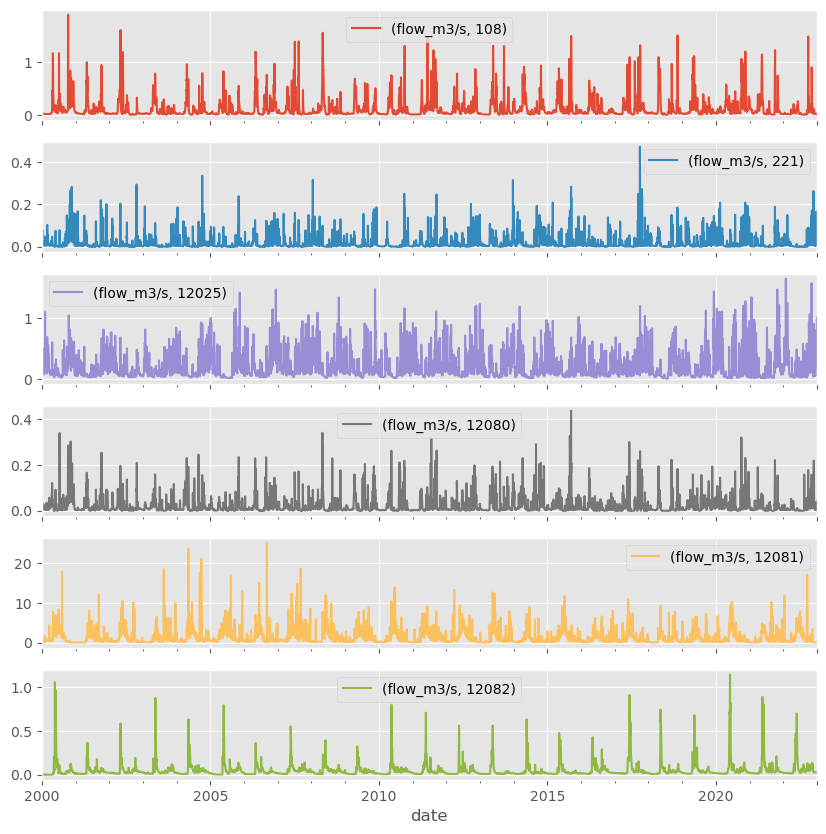

In [7]:
q_df.plot(subplots=True, figsize=(10, 10));